# **Using Logistic Regression to classify the results of the 'Acoustic Extinguisher Fire Dataset'**

## **Let's import the core libraries**

In [2]:
! pip install openpyxl

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## **Now read data from drive excel spreadsheet**

In [29]:
# CONNECT TO DRIVE
from google.colab import drive
drive.mount('/content/drive')


# Data Collection
df = pd.read_excel('/content/drive/MyDrive/VII/Acoustic_Extinguisher_Fire_Dataset.xlsx')


df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


## **Collect some information about our data**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [31]:
df.isna().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

### **Let's look at the distribution of fuels and a pie chart**

In [32]:
pd.get_dummies(df.FUEL)

,gasoline,kerosene,lpg,thinner
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
17437,0,0,1,0
17438,0,0,1,0
17439,0,0,1,0
17440,0,0,1,0


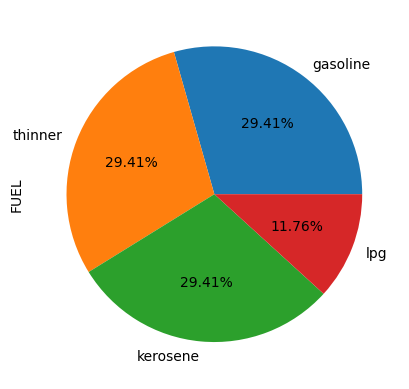

In [33]:
df['FUEL'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

In [34]:
df=pd.concat([df, pd.get_dummies(df.FUEL, drop_first=True)], axis=1)

In [35]:
df.drop('FUEL', axis=1, inplace=True)

In [36]:
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,kerosene,lpg,thinner
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821,0.294118,0.117647,0.294118
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010,0.455658,0.322199,0.455658
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000,1.000000,0.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000,1.000000,1.000000,1.000000


## **For a better understanding, let's build some graphs**

### **Let's look at the skewness of our data**

Col name: SIZE
Skewness: 0.2786998636581806


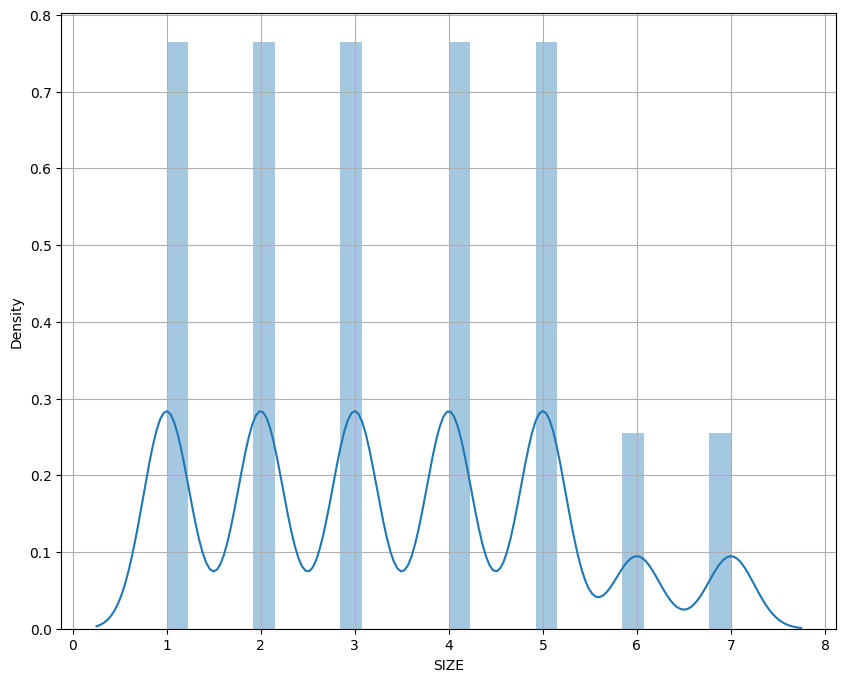

Col name: DISTANCE
Skewness: 0.0


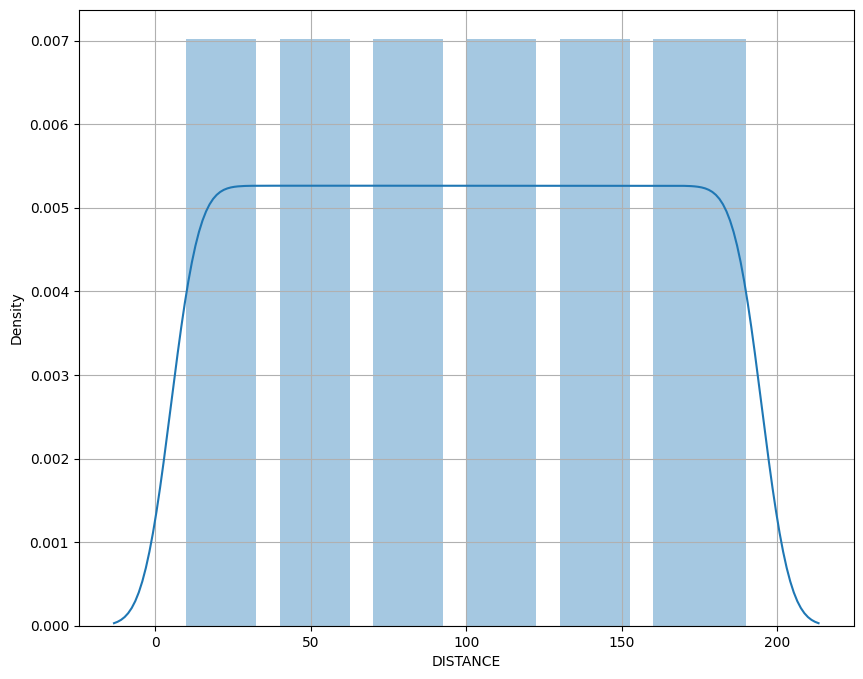

Col name: DESIBEL
Skewness: -0.17903195807888958


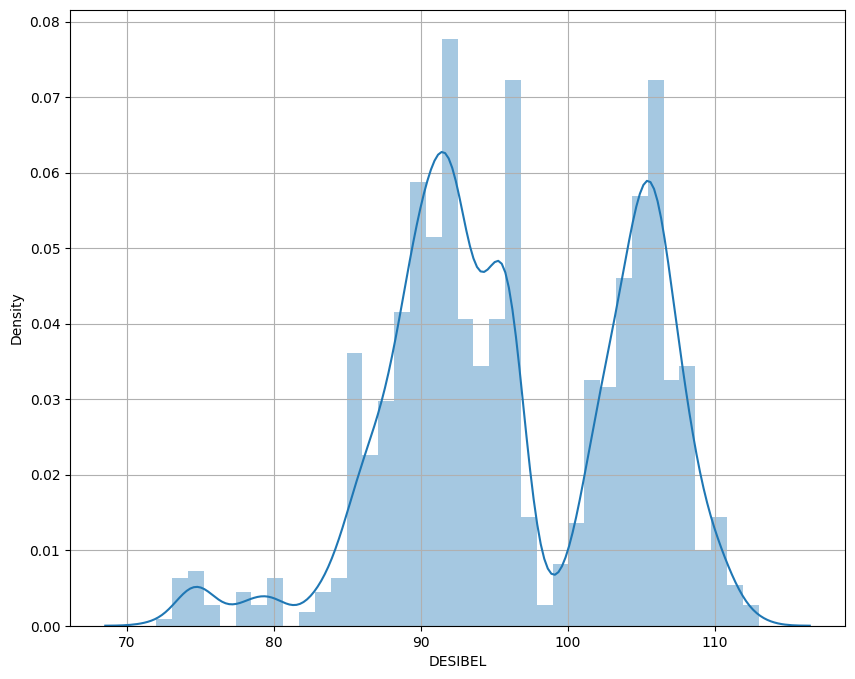

Col name: AIRFLOW
Skewness: 0.24434745944124117


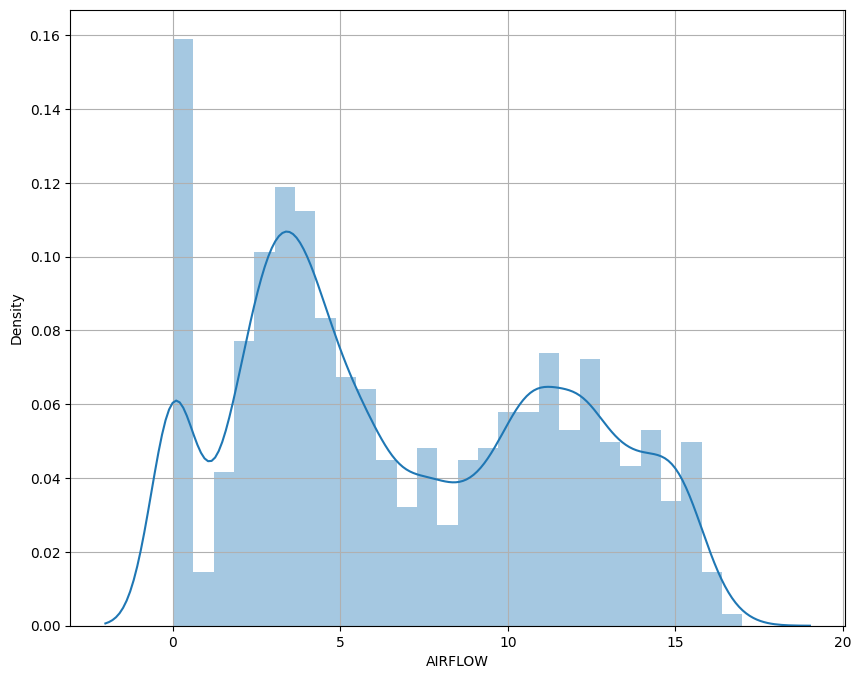

Col name: FREQUENCY
Skewness: 0.4348548916349596


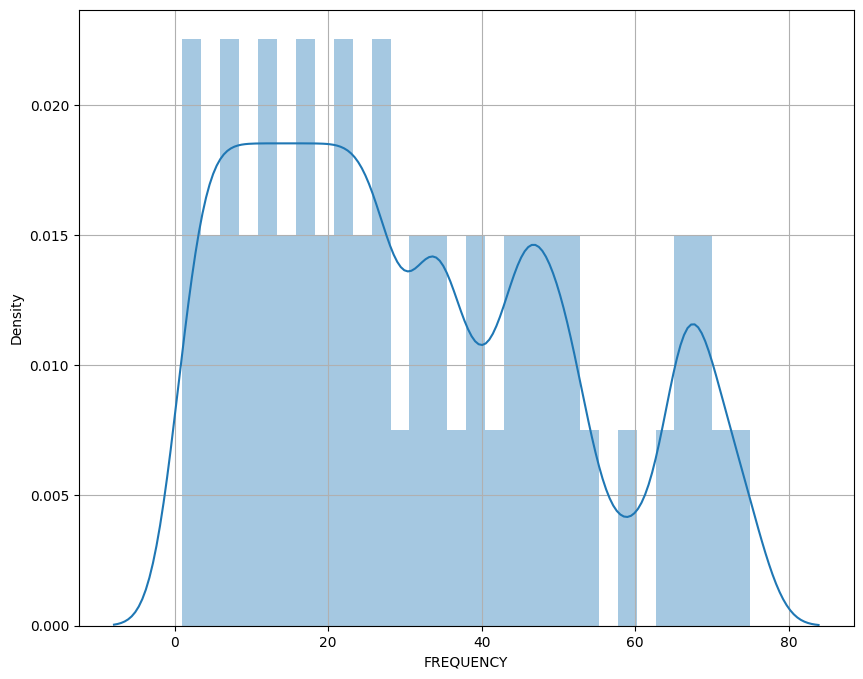

Col name: STATUS
Skewness: 0.008714679678955612


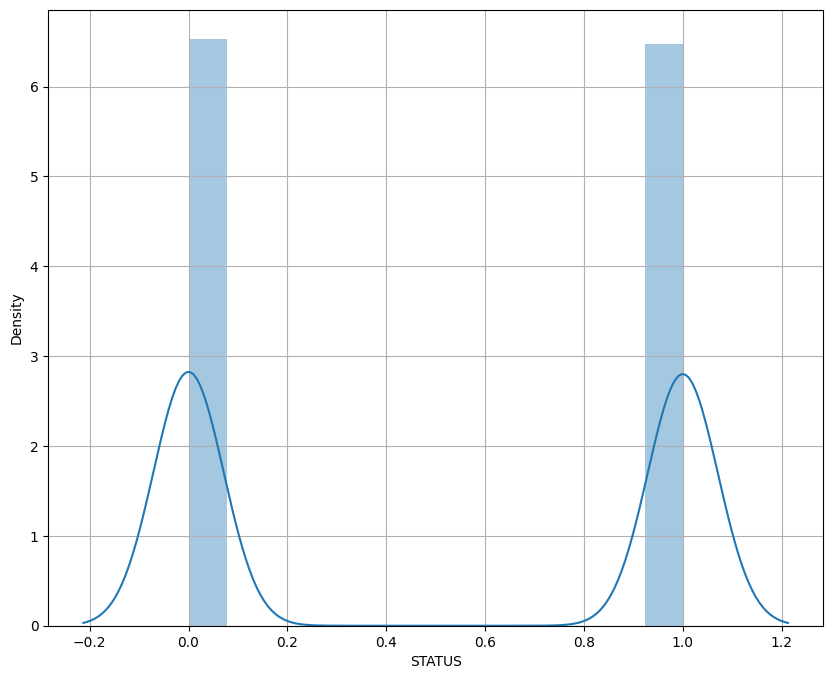

Col name: kerosene
Skewness: 0.9036961141150643


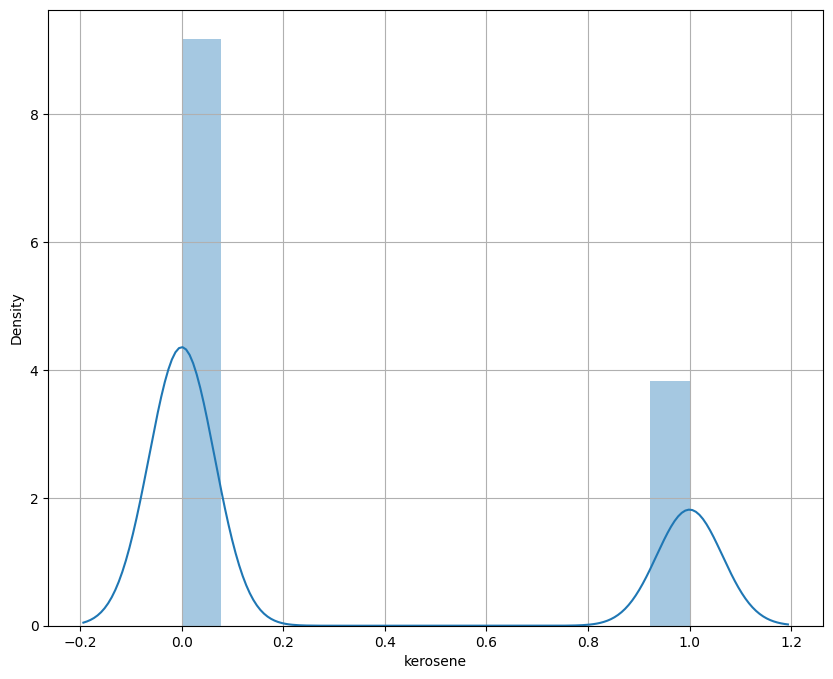

Col name: lpg
Skewness: 2.37346441585572


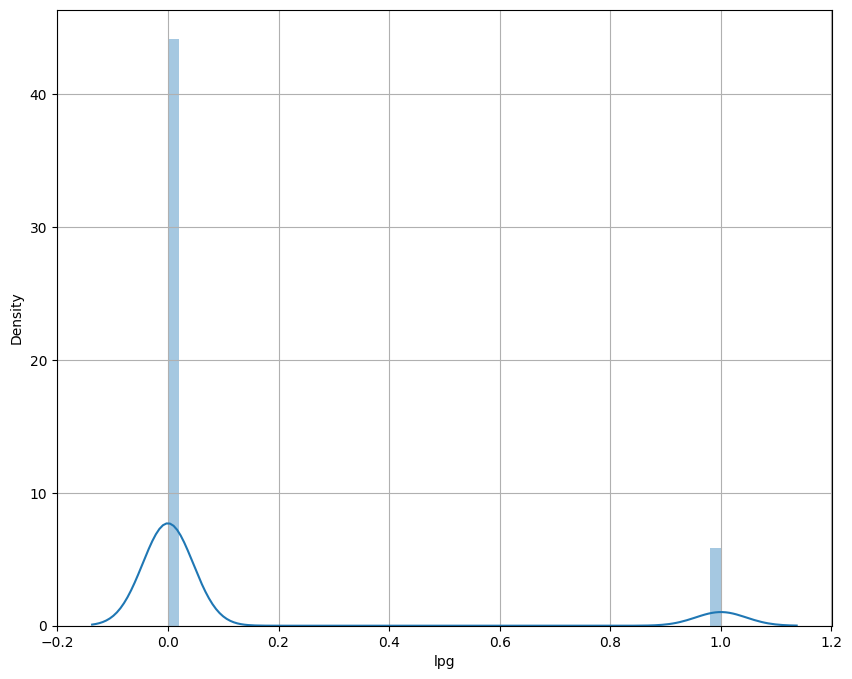

Col name: thinner
Skewness: 0.9036961141150642


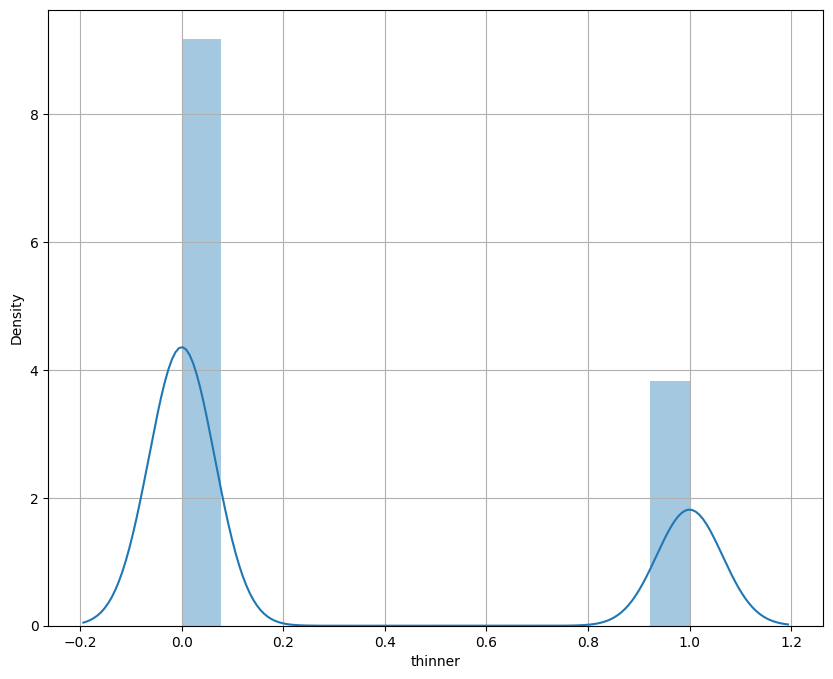

In [37]:
for col in df:
    print(f'Col name: {col}')
    print(f'Skewness: {skew(df[col])}')

    plt.figure(figsize=(10,8))
    sns.distplot(df[col])
    plt.grid(True)
    plt.show()

### **For a better understanding of the data correlation, we will build a heat map**

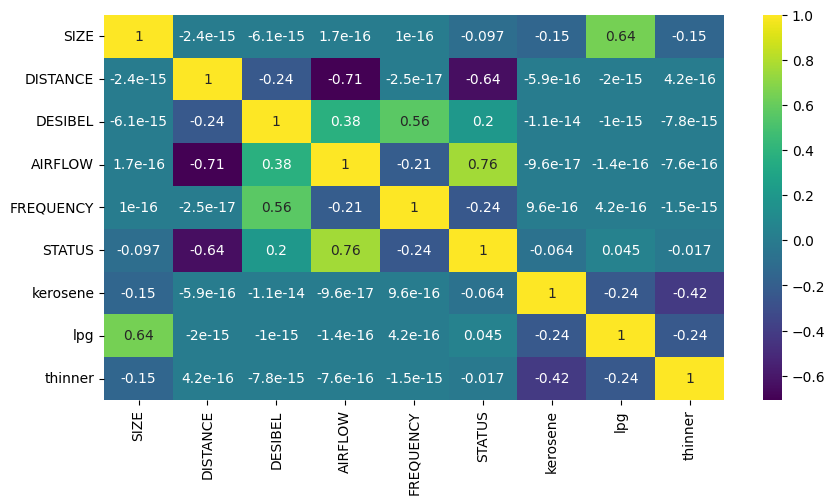

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

### **Let's take a look at the uniqueness of values**

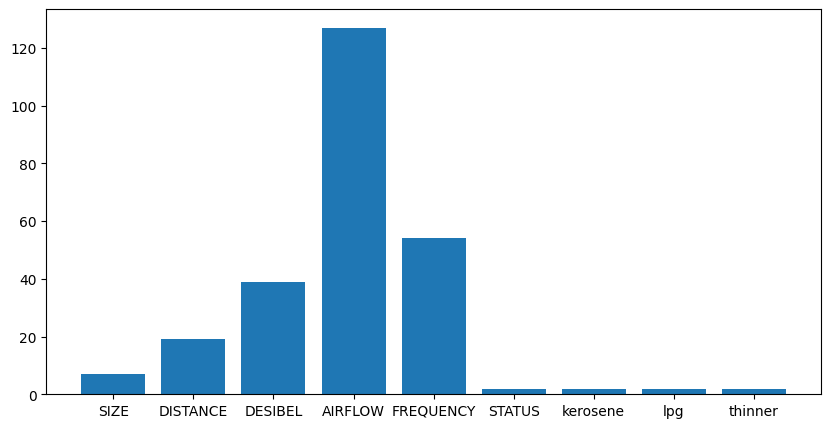

In [39]:
plt.figure(figsize=(10,5))
plt.bar(df.columns, df.nunique())
plt.show()